In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# ReAct (Reasoning + Acting) + Custom tool for Healthcare NL API + Gemini 1.5 Pro + LangChain

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/healthcare/react_gemini_healthcare_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fuse-cases%2Fhealthcare%2Freact_gemini_healthcare_api.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/use-cases/healthcare/react_gemini_healthcare_api.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/healthcare/react_gemini_healthcare_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/healthcare/react_gemini_healthcare_api.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/healthcare/react_gemini_healthcare_api.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/healthcare/react_gemini_healthcare_api.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/53/X_logo_2023_original.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/healthcare/react_gemini_healthcare_api.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/use-cases/healthcare/react_gemini_healthcare_api.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>            

| | |
|-|-|
|Author(s) | [Shade EL-Hadik](https://github.com/elhadik) |
|Last updated | 29 Jul 2024 |

## Overview

Medical coding errors are common and can lead to denied claims, delayed payments, and even patient safety issues. Gen AI can help address these issues by suggesting accurate medical codes, automating tasks, and improving standardization. With a human-in-the-loop approach, this can lead to faster claims processing, better reimbursement, and reduced coder burnout.

Google's large language models (LLMs) have the potential to significantly automate the medical coding process, improving both efficiency and accuracy. By first preprocessing medical records using Healthcare APIs to identify and extract relevant terms, patterns, and relationships, we can then leverage LLMs to suggest appropriate codes for diagnoses and procedures based on physician notes and reports. This will not only save coders time and effort but also reduce errors and inconsistencies, leading to improved reimbursement rates and better financial management for healthcare providers.

**It is always recommended to have a human-in-the-loop when dealing with medical applications. This Colab is meant to accelerate the medical coding processing and not to fully replace a human coder.**

### Intro to Medical Codes

Medical coding is the transformation of healthcare diagnoses, procedures, medical services, and equipment into standardized alphanumeric codes. These codes represent specific clinical information in a standardized format, facilitating communication between healthcare providers, payers, and researchers. Medical codes provide data points about diagnoses, procedures, and resource utilization.

<iframe width="560" height="315" src="https://www.youtube-nocookie.com/embed/fqNBNE_YSro?si=JKaKOWfzdxeFFADe" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

*   **ICD-10 Codes**: International Classification of Diseases, 10th Revision. These are Diagnosis Codes for Conditions Such as Diabetes or Pneumonia.  They Are Also the Codes for Symptoms Such as Headache or Chest Pain.

*   **CPT Codes**:  Current Procedural Terminology. These are Procedures Codes that Describe What is Done by the Healthcare Provider, Hospital, etc., such as MRI, Gall Bladder Surgery or Complete Blood Count Lab Test.  CPT Codes are Also Used for Doctor's Office Visits... These CPT Codes are Referred to as E/M Codes for Evaluation and Management Codes.

*   **DRG Codes**: Diagnosis Related Groups. DRG Codes are Used for Inpatient Medical Services.  A Hospitalized Patient May Have Multiple ICD-10 Diagnosis Codes and Multiple CPT Codes and these will be 'Rolled Into' One DRG Diagnosis Related Group for that Hospital Stay.

*   **HCPCS Codes**: Healthcare Common Procedure Coding System. HCPCS Codes are Also Procedures Codes, but They Are for Procedures that Are Not a Part of the CPT Coding System.  Many Special Medications that are Administered in the Hospital are Coded with a HCPCS Code Because a CPT Code for Them Does Not Exist.

### Architecture Diagram

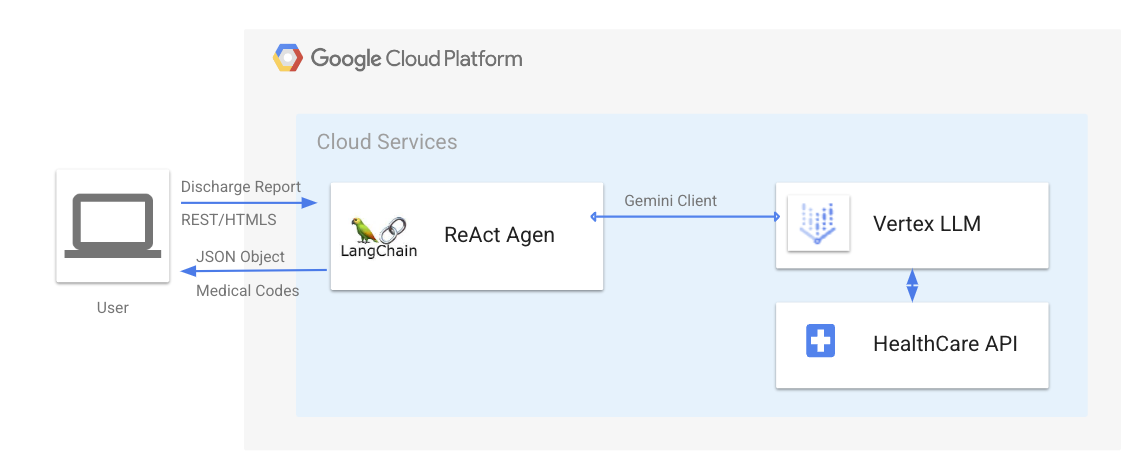

## Getting Started

### Install libraries

In [ ]:
# Tested with these package versions.
%pip install --upgrade google-cloud-aiplatform langchain==0.1.16 langchain-google-vertexai

### Restart current runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which will restart the current kernel.

In [ ]:
# Restart kernel after installs so that your environment can access the new packages
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Define Google Cloud project information

In [ ]:
PROJECT_ID = "YOUR_PROJECT_ID"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

### Enable APIs in Google Cloud project

In [ ]:
!gcloud services enable aiplatform.googleapis.com healthcare.googleapis.com --project $PROJECT_ID

In [ ]:
!gcloud config set healthcare/location $LOCATION

### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment. This step is not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).


In [ ]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    from google.colab import auth

    # Authenticate user to Google Cloud
    auth.authenticate_user()

import vertexai

# Initialize Vertex AI
vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries


In [ ]:
import json

import google.auth
import google.auth.transport.requests
from langchain.agents import AgentType, initialize_agent
from langchain.tools import StructuredTool
from langchain_google_vertexai import VertexAI
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import requests

# get access token

creds, project = google.auth.default()
auth_req = google.auth.transport.requests.Request()
creds.refresh(auth_req)
creds.token

## Configure and call Healthcare API

*   The [Cloud Healthcare API](https://cloud.google.com/healthcare-api?hl=en) provides industry-standard protocols and formats for ingesting, storing, analyzing, and integrating healthcare data with cloud-based applications. In the section below, we call the Google Healthcare API to preprocess medical records, in this case, a discharge report. Medical records can be unstructured text and are usually hard to read. The Healthcare API can help with this problem by extracting all medical terms from the unstructured text, identifying patterns, and establishing medical relationships.

In [ ]:
# @title Enter the Discharge Report Summary

TEXT = "Most Responsible Diagnosis: COPD Exacerbation  Active Issues Managed in Hospital: Pulmonary edema Microcytic anemia Gout Purpuric rash NYD  Course in Hospital:  Mr. Johnson arrived in the ER from nursing home with a three-day history of worsening shortness of breath, yellow-green sputum, and increased sputum production. He was subsequently diagnosed with a COPD exacerbation and was satting at 84% on 4L O2 by nasal prongs. He was stepped up to BiPAP for 24 hours and prednisone, ciprofloxacin, and around the clock puffers were initiated. By day 2 of admission he was stepped down to oxygen by nasal prongs and QID puffers.  In terms of respiratory complications, Mr. Johnson had a sudden hypoxic resp failure on day 3 of admission. CCOT was involved, but ICU was avoided. He was found to be in pulmonary edema that responded to diuresis. Last documented echo was completed 15 years ago and a repeat echo was ordered to be completed as an outpatient.    Unfortunately on day 4 of admission Mr. Johnson also developed gout in the left MTP. This limited his mobility and contributed to deconditioning for which PT was involved. Also, by day 6 of admission a purpuric rash was noted on the upper and lower extremities, cause was unknown and punch biopsy was performed. The results are still pending. Lastly, upon admission Mr. Johnson was found to have a microcytic anemia. On history Mr. Johnson states he no longer eats much red meat or leafy greens, preferring tea and toast for most of his meals. There was no history of bleeding and previous FOBT testing was normal. Further testing revealed iron deficiency anemia and therapy with ferrous fumarate was initiated.   On day of discharge, Ms. Johnson was on room air but continued to be on Lasix.  Continued Home Medications: Albuterol 2 puffs q 4-6 hours daily Atrovent 2 puffs q 6h ASA 325 mg daily Metoprolol 25 mg BID Atorvastatin 40 mg daily Ramipril 10 mg daily Amlodipine 5 mg daily Metformin 1000 mg BID Terazosin 5 mg qhs Tylenol 325 mg qhs Lactulose 15cc qhs prn Citalopram 20 mg daily Multivitamin  Medications Changes: Ramipril was STOPPED Lasix was STARTED at 20mg PO BID Amlodipine was INCREASED to 10mg daily Ferrous fumarate 325 mg QHS was STARTED  Important Test Results:  CXR completed April 20th 2019 revealed pulmonary edema and enlarged cardiac silhouette Sputum culture collected April 18th 2019 was positive for pseudomonas aeruginosa  Pending Tests or Results: Echo ordered as outpatient Skin biopsy results pending  Follow-up Plans:  We asked the patient to make an appointment with their family MD next week. The patient will follow up in urgent resp clinic in 2-4 weeks time. Since moving to London the patient is not currently followed by a respirologist and since this is the third exacerbation this year a goals of care discussion may be warranted. The patient was also seen by our COPD Navigator Team and arrangements have been made to be seen as an outpatient."  # @param{type:"string"}

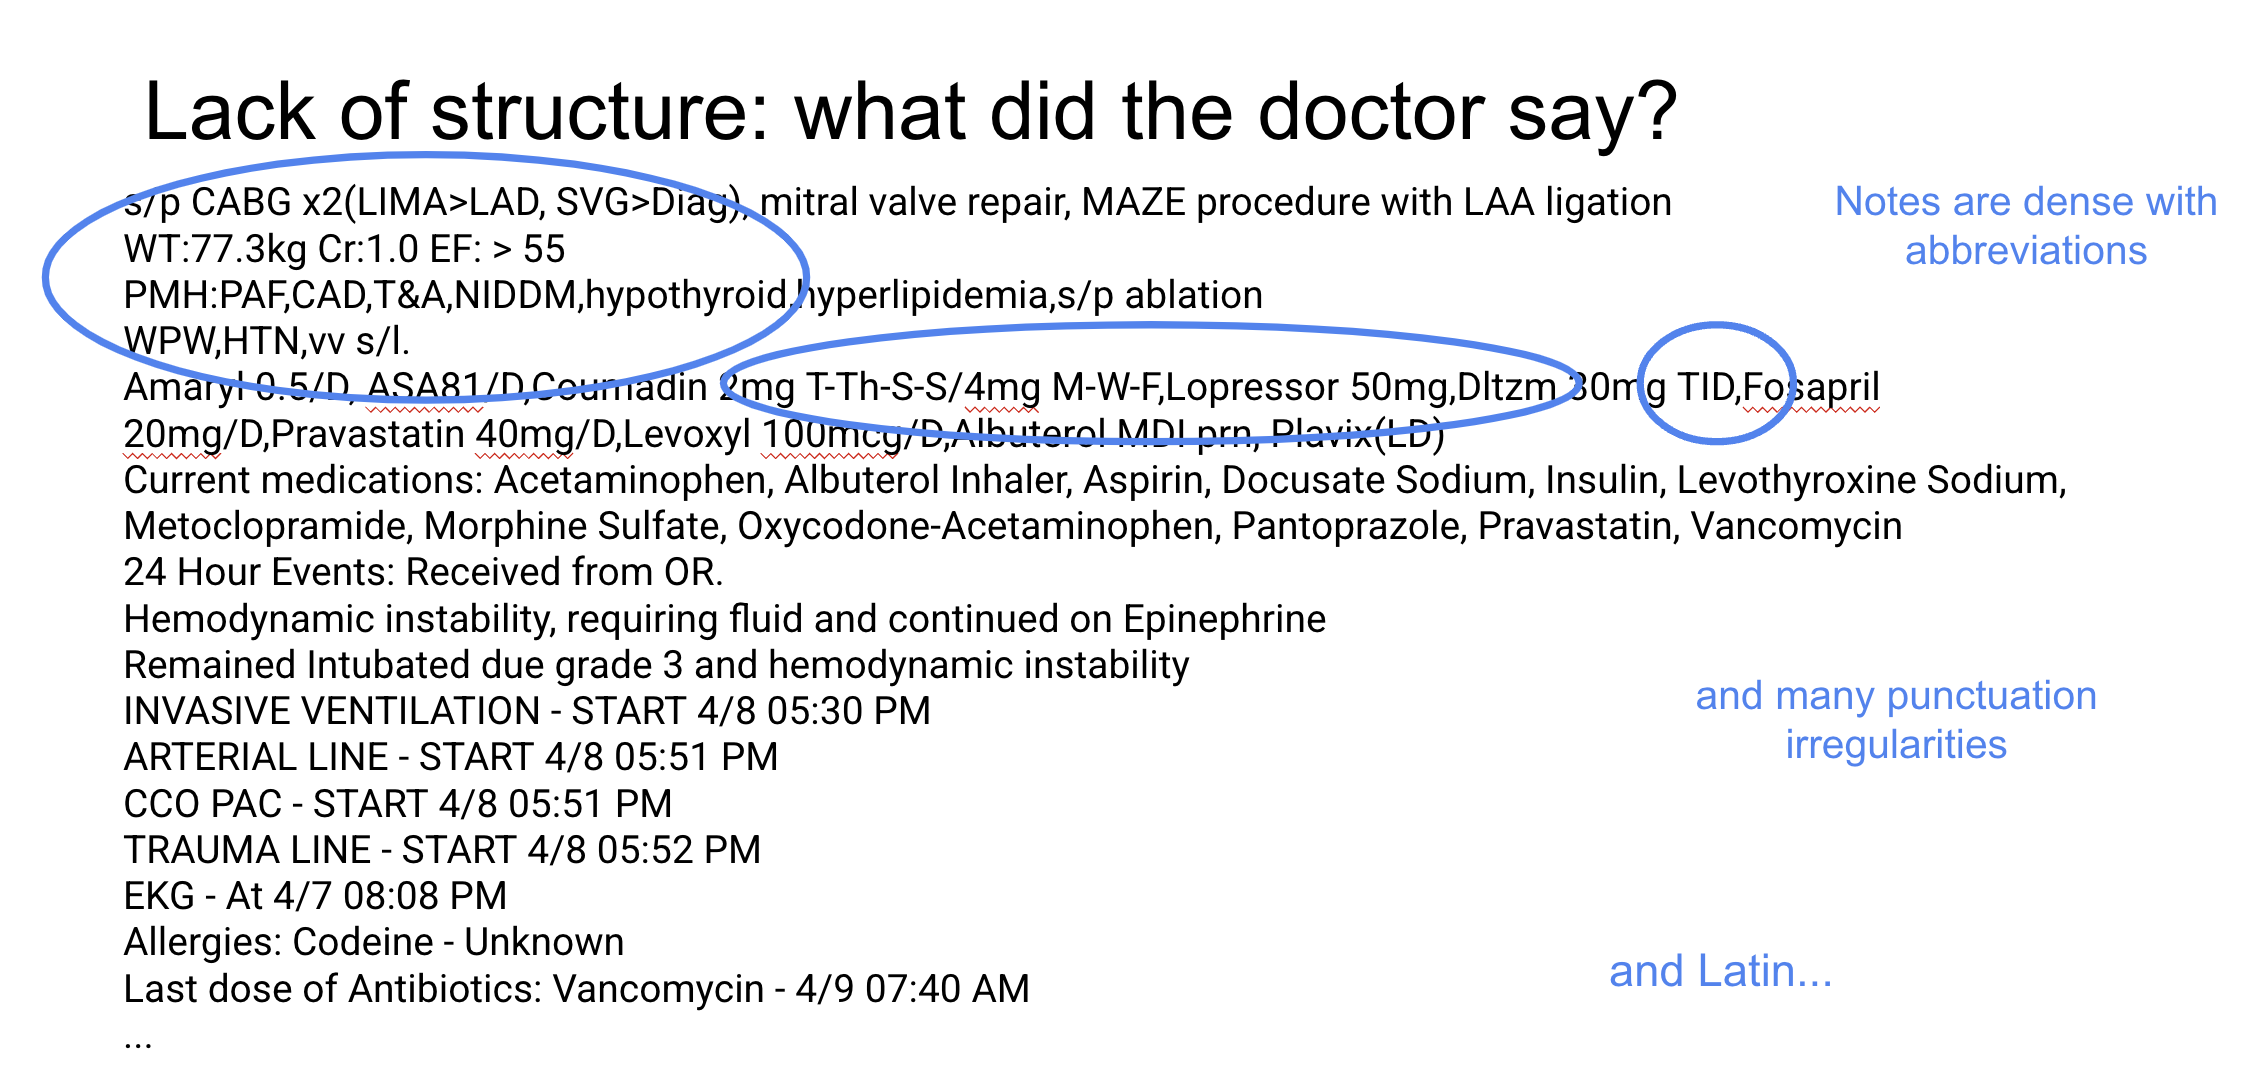


In the below section, we use [`networkx`](https://networkx.org/), a Python Knowledge Graph libary, to visualize the relationships among medical terms that were captured by the Healthcare API. This is to illustrate the relationships that Healthcare API draws among the different medical terms, such as the relation between a medication and the recommend dose frequency, or the relation between a diagnosis and its severity

In [ ]:
# @title Visualize Healthcare NLP


def healthcare_nl(text: str) -> str:
    """Sends a REST request to the Healthcare Natural Language API"""
    # Set the API endpoint
    url = f"https://healthcare.googleapis.com/v1/projects/{PROJECT_ID}/locations/{LOCATION}/services/nlp:analyzeEntities"

    # Set the request headers
    headers = {
        "Authorization": f"Bearer {creds.token}",
        "X-Goog-User-Project": PROJECT_ID,
        "Content-Type": "application/json",
        "Accept": "application/json",
    }

    # Set the request data
    data = {"documentContent": text, "licensedVocabularies": ["SNOMEDCT_US", "ICD10CM"]}

    # Make the API request
    response = requests.post(url, headers=headers, data=json.dumps(data))

    return response.json()


response_json = healthcare_nl(TEXT)

# Create DataFrame for entities
df = pd.DataFrame.from_records(
    [
        {
            "ID": entity["mentionId"],
            "Desc": f"{entity['type']} : {entity['text']['content']}",
            "Type": entity["type"],
            "Content": entity["text"]["content"],
        }
        for entity in response_json["entityMentions"]
    ]
)


# Create DataFrame for knowledge graph
kg_df = pd.DataFrame.from_records(
    [
        {
            "source": df.loc[df["ID"] == relation["subjectId"], "Desc"].values[0],
            "target": df.loc[df["ID"] == relation["objectId"], "Content"].values[0],
            "edge": df.loc[df["ID"] == relation["objectId"], "Type"].values[0],
        }
        for relation in response_json["relationships"]
    ]
)


# Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(
    kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph()
)

plt.figure(figsize=(15, 15))


# draw the graph
nx.draw(
    G,
    with_labels=True,
    pos=nx.kamada_kawai_layout(G),
    edge_color="silver",
    node_color="silver",
)
nx.draw_networkx_edge_labels(G, pos=nx.kamada_kawai_layout(G))

plt.show()

## Use ReAct agent and LangChain custom tools  

The section below uses LangChain [ReAct agent](https://python.langchain.com/docs/modules/agents/agent_types/react) (reasoning + actions), which combines chain of thought and tool usage together to reason through comlex tasks by interacting with external systems, in this case external system is the Healthcare API.

ReAct-style prompting is currently (Fall 2023) the state-of-the-art for most prompt-driven LLM tasks. When you use plugins or extensions, where an LLM or LLM-based chatbot or system interacts with an external system, you are using a ReAct-style system. In general, any LLM system that reflects up-to-date knowledge is invisibly using ReAct-style functionality under-the-hood.

ReAct chains typically have three interleaved parts:

- **Thoughts**: Like in chain of thought, these are waypoints, plans, reasoning, etc. generated by the LLM as it makes progress towards the final output.
- **Actions**: LLM-generated commands, calls, or instructions to access an external system. The external system may be a tool that provides information, but can also be more general (i.e., the action observes or changes the state of an external system).
- **Observations**: A response, feedback, result, etc. from the external system, inserted into an LLM call to generate the next thought.

These three steps are repeated until the LLM completes its task.

**We are using LangChain ReAct as a quick means for prototyping, but you may also consider other prompting techniques like chain of thought or calling the LLM directly**

In [ ]:
# @title Define the prompt

prompt = """

pretend that you are a professional medical coder
First:  Pass on the entire text to the list_of_medical_terms tool to find the correct medical terms in the discharge report
Second: Find the associated medical codes and their short explanation, for these medical terms that you just retrieved,  and use only the below codes:
  1- ICD-10 : International Classification of Diseases, 10th Revision,
  2- CPT Codes:  Current Procedural Terminology,
  3- DRG Codes: Diagnosis Related Groups.
  4- HCPCS Codes: Healthcare Common Procedure Coding System.
Third:  Format the output as a JSON object with the following keys:
        Code_Type
        Code_Value
        Code_Explanation




   {discharge_report}







use the below as an example of the output:

  {example}


"""

example_output = """

{'medical_terms': [{'Code_Type': 'ICD-10',
   'Code_Value': 'J44.9',
   'Code_Explanation': 'COPD with exacerbation'},
  {'Code_Type': 'ICD-10',
   'Code_Value': 'J96.91',
   'Code_Explanation': 'Respiratory failure, unspecified'},
  {'Code_Type': 'ICD-10',
   'Code_Value': 'J81.0',
   'Code_Explanation': 'Pulmonary edema'},
  {'Code_Type': 'ICD-10',
   'Code_Value': 'D63.81',
   'Code_Explanation': 'Microcytic anemia'},
  {'Code_Type': 'ICD-10',
   'Code_Value': 'M10.9',
   'Code_Explanation': 'Gout unspecified'},
  {'Code_Type': 'ICD-10',
   'Code_Value': 'L98.9',
   'Code_Explanation': 'Purpura, unspecified'},
  {'Code_Type': 'ICD-10',
   'Code_Value': 'B01.2',
   'Code_Explanation': 'Pseudomonas aeruginosa infection'},
  {'Code_Type': 'ICD-10',
   'Code_Value': 'J44.1',
   'Code_Explanation': 'Chronic obstructive pulmonary disease'},
  {'Code_Type': 'CPT',
   'Code_Value': '0005T',
   'Code_Explanation': 'Chest radiography, single view, frontal'},
  {'Code_Type': 'CPT',
   'Code_Value': '95025',
   'Code_Explanation': 'Echocardiography, transthoracic'},
  {'Code_Type': 'CPT',
   'Code_Value': '87650',
   'Code_Explanation': 'Skin biopsy, punch'},
  {'Code_Type': 'CPT',
   'Code_Value': '87209',
   'Code_Explanation': 'Sputum culture, routine'},
  {'Code_Type': 'CPT',
   'Code_Value': '99223-99238',
   'Code_Explanation': 'Office or other outpatient visit for the evaluation and management of an established patient...'},
  {'Code_Type': 'DRG',
   'Code_Value': '896',
   'Code_Explanation': 'Cardiac dysrhythmias'},
  {'Code_Type': 'DRG', 'Code_Value': '483', 'Code_Explanation': 'Pneumonia'},
  {'Code_Type': 'DRG',
   'Code_Value': '963',
   'Code_Explanation': 'COPD and related conditions'},
  {'Code_Type': 'HCPCS',
   'Code_Value': 'J7310',
   'Code_Explanation': 'Albuterol sulfate inhalation solution'},
  {'Code_Type': 'HCPCS',
   'Code_Value': 'J3301',
   'Code_Explanation': 'Ipratropium bromide inhalation solution'},
  {'Code_Type': 'HCPCS',
   'Code_Value': 'Q4016',
   'Code_Explanation': 'Metformin hydrochloride tablet'},
  {'Code_Type': 'HCPCS',
   'Code_Value': 'J1800',
   'Code_Explanation': 'Metoprolol tartrate tablet'},
  {'Code_Type': 'HCPCS',
   'Code_Value': 'J0630',
   'Code_Explanation': 'Amlodipine besylate tablet'},
  {'Code_Type': 'HCPCS',
   'Code_Value': 'J1349',
   'Code_Explanation': 'Atorvastatin calcium tablet'},
  {'Code_Type': 'HCPCS',
   'Code_Value': 'J7750',
   'Code_Explanation': 'Ramipril tablet'},
  {'Code_Type': 'HCPCS',
   'Code_Value': 'J3105',
   'Code_Explanation': 'ASA enteric coated tablet'},
  {'Code_Type': 'HCPCS',
   'Code_Value': 'J0305',
   'Code_Explanation': 'Citalopram hydrobromide tablet'},
  {'Code_Type': 'HCPCS',
   'Code_Value': 'J9165',
   'Code_Explanation': 'Terazosin hydrochloride tablet'},
  {'Code_Type': 'HCPCS',
   'Code_Value': 'Q6315',
   'Code_Explanation': 'Ferrous fumarate tablet'}]}
   """

prompt = prompt.format(discharge_report=TEXT, example=example_output)

In [ ]:
# @title Call the LLM and pass on the Healthcare API as a custom tool and show reasoning steps


def list_of_medical_terms(text: str) -> list[str]:
    """Sends a REST request to the given Healthcare API to retrieve medical terms for diagnosis, procedures, medicines, and lab data"""
    # Extract the entities from the response
    response_json = healthcare_nl(text)

    type_categories = {
        "PROBLEM",
        "MEDICINE",
        "MEDICAL_DEVICE",
        "PROCEDURE",
        "LABORATORY_DATA",
    }

    # Remove duplicates
    return list(
        {
            entity["text"]["content"]
            for entity in response_json["entityMentions"]
            if entity["type"] in type_categories
        }
    )


# Create the custom tool that will call the external system to extract the medical terms from the patient records
tools = [StructuredTool.from_function(list_of_medical_terms)]

# Create the LLM.
# This is the langchain connection to Vertex AI.
# Note this depends on vertexai.init
llm = VertexAI(model_name="gemini-1.5-pro", max_output_tokens=8042, temperature=0)

# Create the ReAct agent.
agent = initialize_agent(
    tools,
    llm,
    verbose=True,
    max_execution_time=1000,
    max_iterations=3,
    handle_parsing_errors=True,
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,
)

# call the LLM
agent.run(prompt)

In [ ]:
# @title Call the LLM and pass on the Healthcare API as a custom tool and DO NOT show reasoning steps

agent = initialize_agent(
    tools,
    llm,
    verbose=False,  # Hides reasoning steps
    max_execution_time=1000,
    max_iterations=3,
    handle_parsing_errors=True,
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,
)

*   Repeatedly querying a model with the same prompt and selecting the majority response as the final answer, a technique known as ***self-consistency***, demonstrably improves performance on arithmetic, common sense reasoning, and symbolic tasks.

In [ ]:
outputs = []
vote = 0
final_output: str
num_of_attempts = 10

# call the LLM
for _ in range(num_of_attempts):
    tmp = agent.run(prompt)
    outputs.append(tmp)
    temp_vote = outputs.count(tmp)
    if temp_vote > vote:
        vote = temp_vote
        final_output = tmp

print(f"vote count: {vote}")
print(f"final_output: {final_output}")